# Thư viện

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install py_vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 15.0 MB/s 
  Created wheel for py-vncorenlp: filename=py_vncorenlp-0.1.3-py3-none-any.whl size=4307 sha256=3bcf8ec58e61b9ed3dbe481a14ef304453e021c120b5de09ffa8dac495e888b8
  Stored in directory: /root/.cache/pip/wheels/d7/73/13/6b1f2c14831151fc1417f3dc1fa6b241e27ad13f8c83691753
Successfully built py-vncorenlp


In [ ]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.0 MB 14.5 MB/s 
     |████████████████████████████████| 591 kB 78.6 MB/s 
     |████████████████████████████████| 1.0 MB 63.1 MB/s 


In [ ]:
!pip install vncorenlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 15.6 MB/s 
  Created wheel for vncorenlp: filename=vncorenlp-1.0.3-py3-none-any.whl size=2645950 sha256=aa2c6fbe441f7ee955c96e86ba81d04bd289024ff7b206ca20c7b3a07cd1af68
  Stored in directory: /root/.cache/pip/wheels/3c/e9/86/706911c12e307aeb9a2702399f0dad38d36f1d6f9dde8af35e
Successfully built vncorenlp


In [ ]:
import py_vncorenlp
from underthesea import word_tokenize
from vncorenlp import VnCoreNLP
import pandas as pd

In [ ]:
model = py_vncorenlp.download_model(save_dir='/content/drive/MyDrive/NLP')

The VnCoreNLP model is already!


# VNCoreNLP

In [ ]:
modelSegmentation =  py_vncorenlp.VnCoreNLP(annotators=["wseg"], save_dir='/content/drive/MyDrive/NLP')
# modelPos = py_vncorenlp.VnCoreNLP(annotators=["pos"], save_dir='/content/drive/MyDrive/NLP')

In [ ]:
vncorenlp_file = r'/content/drive/MyDrive/NLP/VnCoreNLP-1.1.1.jar'

In [ ]:
vncorenlp = VnCoreNLP(vncorenlp_file)

In [ ]:
# path_save = '/content/drive/MyDrive/NLP/data.txt'
path_save = '/content/drive/MyDrive/NLP/save_data/data_10/data_10_tokenizer.txt'


In [ ]:
with open('/content/drive/MyDrive/NLP/save_data/data_10/data_10_test.txt', 'r', encoding ='utf-8') as f:
  sentences = f.readlines()
  # print(sentences)
# with open('/content/drive/MyDrive/NLP/vncore_token.txt', 'w', encoding = 'utf-8') as f:
output_l  = []
with open(path_save, mode='w', encoding= 'utf-8') as my_file:
  for sentence in sentences:
    output = modelSegmentation.word_segment(sentence)
    # print(output[0])
    words = output[0].split(' ')
    words = '\n'.join(words)
    output_l.append(words)
    my_file.write(words)
    if sentence != sentences[-1]:
      my_file.write('\n\n')

    # output_l.append(output)
  # print(output_l)
    # f.write(' '.join())

In [ ]:
count_vncore_compounds = 0
for sentence in output_l:
    for word in sentence.split():
        if '_' in word: count_vncore_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP:', count_vncore_compounds)

Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP: 29


# Pos Tag with VNCoreNLP

In [ ]:
def VnCoreNLP_Tag(path):
    manual_tokens = open(path, encoding='utf-8').readlines()
    print('Số lượng từ:', len(manual_tokens))

    
    for word in manual_tokens:
        word = word.replace('\n', '')
        with VnCoreNLP(vncorenlp_file) as vncorenlp:
          if '_' not in word: tag = vncorenlp.pos_tag(word)
          else: tag = vncorenlp.pos_tag(word.replace('_', ' '))
          
          if tag == []:
            with open('/content/drive/MyDrive/NLP/save_data/data_10/vncore_pos_tag_10.txt', 'a', encoding='utf-8') as f:
              f.write('\n')
          else:
            print(word,'-' ,tag[0][0][1])
            # f.write(f'{word}\t{tag[0][0][1]}\n')
            with open('/content/drive/MyDrive/NLP/save_data/data_10/vncore_pos_tag_10.txt', 'a', encoding='utf-8') as f:
               f.write(f'{word}\t{tag[0][0][1]}\n')
        # f.write('\n')

In [ ]:
path_file = '/content/drive/MyDrive/NLP/save_data/data_10/data_10_tokenizer.txt'
VnCoreNLP_Tag(path_file)

Số lượng từ: 101
Hôm_nay - N
, - CH
tôi - P
sẽ - R
suy_nghĩ - V
về - E
những - L
gì - P
mà - C
bạn - N
nói - V
. - CH
Bà - N
lên - V
kế_hoạch - N
thật - T
tỉ_mỉ - A
để - E
đọc - V
quyển - Nc
sách - N
này - P
. - CH
Đàn_ông - Np
Nhật_Bản - Np
mắc - V
ung_thư - N
dạ_dày - N
đều - R
sử_dụng - V
thuốc_lá - N
. - CH
Bố_mẹ - N
thường - R
đọc - V
chuyện - N
cho - E
Đức - Np
nghe - V
. - CH
Nga - Np
biết - V
rõ - A
Đài_Loan - Np
sẽ - R
làm_việc - V
chặt_chẽ - A
. - CH
Trang - Np
băn_khoăn - A
, - CH
chưa - R
nói_chuyện - V
với - E
phụ_huynh - N
. - CH
Việc - N
tiến_hành - V
sàn - N
lọc - V
tại - E
bệnh_viện - N
K - Np
mang - V
lại - R
hiệu_quả - N
tích_cực - A
. - CH
Thế_là - C
cậu - N
ấy - P
xén - V
lông - N
bốn - M
con - N
cừu - N
. - CH
Thất_bại - V
khiến - V
Cristiano_Ronaldo - Np
cảm_thấy - V
áp_lực - N
. - CH
Chủ - N
đơn_vị - N
Đài_Loan - Np
thuê - V
xe_khách - N
để - E
ăn - V
tối - N
. - CH


# Undertheseas

In [ ]:
path_save = '/content/drive/MyDrive/NLP/data_underthesea.txt'

In [ ]:
with open('/content/drive/MyDrive/NLP/dataNlp.txt', 'r', encoding ='utf-8') as f:
  sentences = f.readlines()
  # print(sentences)
# with open('/content/drive/MyDrive/NLP/vncore_token.txt', 'w', encoding = 'utf-8') as f:
output_l2 = []
with open(path_save, mode='w', encoding= 'utf-8') as my_file:
  for sentence in sentences:
    # output = modelSegmentation.word_segment(sentence)
    output = word_tokenize(sentence, format="text")
    words = output.split(' ')
    words = '\n'.join(words)
    # print(words)
    output_l2.append(words)
    my_file.write(words)
    if sentence != sentences[-1]:
      my_file.write('\n\n')
    # print(output)

In [ ]:
count_underthesea_compounds = 0
for sentence in output_l2:
    for word in sentence.split():
        if '_' in word: count_underthesea_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP:', count_underthesea_compounds)

Số lượng từ ghép khi tách từ bằng thư viện VnCoreNLP: 75


# Pos Tag with Undertheseas

In [ ]:
from underthesea import pos_tag

In [ ]:
def Underthesea_Tag(path):
    manual_tokens = open(path, encoding='utf-8').readlines()
    print('Số lượng từ:', len(manual_tokens))

    with open('/content/drive/MyDrive/NLP/underthesea_pos', 'w', encoding='utf-8') as f:
        for word in manual_tokens:
            word = word.replace('\n', '')
            print(word)
            if '_' not in word: 
              tag = pos_tag(word) 
              print(tag)
            else: 
              tag = pos_tag(word.replace('_', ' '))
              print(tag)
            if tag == []: f.write('\n')
            else: f.write(f'{word}\t{[tag][0][0][1]}\n')
        f.write('\n')

In [ ]:
path_file = '/content/drive/MyDrive/NLP/data_test.txt'
Underthesea_Tag(path_file)

In [ ]:
with open('/content/drive/MyDrive/NLP/data_begin.txt', 'r', encoding = 'utf-8') as f:
  sentences = f.readlines()
  with open('/content/drive/MyDrive/NLP/data_begin_new.txt', 'w', encoding = 'utf-8') as my_file:
    for sentence in sentences:
      new_sentence =  sentence.replace(sentence[0:4],' ')
      my_file.write(new_sentence)
    my_file.write('\n')

# Eval Manual Pos with VnCoreNLP Pos

In [ ]:
def read_data(path):
  with open(path, 'r', encoding = 'utf-8') as f:
    sentence = f.readlines()
  return sentence

In [ ]:
def compute_accuracy(pred, y):
  #pred là danh sách các từ đã gán nhãn của pp cần tính độ chính xác
  #y là tập gold đã gán bằng tay

  # Khởi tạo 2 biến để đếm số lượng từ đúng và tổng số từ
  num_correct = 0
  total = 0
  i = 1
  # if method == 1:
  for predict, y in zip(pred, y):
    # if method == 1:  # method = 1 sử dụng cho phương pháp VNCoreNLP
    word_tag_tuple = y.replace('\n', '').split('\t')
    print(word_tag_tuple)
    # if method == 2:   # method = 2 sử dụng cho phương pháp Underthesea
    #   print("in 2")
    #   word_tag_tuple = y.replace('\n', '').split(' ')
    if(len(word_tag_tuple) != 2 ):
      continue
    

    word, tag = word_tag_tuple
    print("Predict", predict)
    print("Tag", tag)
    if predict == tag:
      num_correct += 1
      # print(f"Num correct {i} : {num_correct}")
      # print('Total', total)
      # print('\n')
    total += 1

  return num_correct/total

In [ ]:
def eval(path_ground_truth, path_method):
  y = read_data(path_method)

  VnCore_test = open(path_ground_truth, encoding = 'utf-8').readlines()
  pred = []
  for i in VnCore_test:
    try:
      pred.append(i.split()[1])
    except:
      pred.append('\n')
  print(f"Accuracy {compute_accuracy(pred, y):.4f}")

In [ ]:
path_vncore_manual_postag = '/content/drive/MyDrive/NLP/save_data/acc_vncore/vncore_pos_tag_manual.txt'
path_vncore_pos_tag = '/content/drive/MyDrive/NLP/save_data/acc_vncore/vncore_pos_tag.txt'

In [ ]:
eval(path_ground_truth, path_VnCoreNlp)

Accuracy 0.7874


In [ ]:
# Accuracy VnCoreNlp trên tập train
path_train_predict_postag = '/content/drive/MyDrive/NLP/save_data/acc_vncore/vncore_train_predict_postag.txt'
path_vncore_postag_manual = '/content/drive/MyDrive/NLP/save_data/acc_vncore/vncore_train_postag_manual.txt'
eval(path_vncore_postag_manual, path_train_predict_postag )

Accuracy 0.8269


In [ ]:
#Accuracy VnCoreNLP tập test
path_test_predict_postag = '/content/drive/MyDrive/NLP/save_data/acc_vncore/vncore_test_predict_postag.txt'
path_vncore_postag_manual_test = '/content/drive/MyDrive/NLP/save_data/acc_vncore/vncore_test_postag_manual.txt'
eval(path_vncore_postag_manual_test, path_test_predict_postag )


['Chỉ', 'R']
Predict V
Tag R
['cần', 'V']
Predict V
Tag V
['em', 'N']
Predict N
Tag N
['ngồi', 'V']
Predict V
Tag V
['sau_cùng', 'X']
Predict A
Tag X
['anh', 'N']
Predict N
Tag N
['ta', 'P']
Predict N
Tag P
['đi', 'V']
Predict V
Tag V
['đến', 'V']
Predict V
Tag V
['đâu', 'P']
Predict P
Tag P
['cũng', 'R']
Predict R
Tag R
['được', 'V']
Predict V
Tag V
['.', 'CH']
Predict CH
Tag CH
['']
['Con_người', 'N']
Predict N
Tag N
['trong', 'E']
Predict E
Tag E
['nghịch_cảnh', 'N']
Predict N
Tag N
['càng', 'R']
Predict N
Tag R
['không', 'R']
Predict A
Tag R
['được', 'V']
Predict A
Tag V
['phép', 'N']
Predict N
Tag N
['chịu', 'V']
Predict V
Tag V
['đầu_hàng', 'V']
Predict V
Tag V
['.', 'CH']
Predict CH
Tag CH
['']
['Bà', 'N']
Predict N
Tag N
['bó', 'V']
Predict V
Tag V
['cỏ', 'N']
Predict N
Tag N
['.', 'CH']
Predict CH
Tag CH
['']
['Cá_bò', 'Np']
Predict N
Tag Np
['xin_lỗi', 'V']
Predict V
Tag V
['mẹ', 'N']
Predict N
Tag N
['.', 'CH']
Predict CH
Tag CH
['']
['Bố', 'N']
Predict N
Tag N
['và', 'Cc']


# Eval Tokenize

## Manual_Tokenize

In [ ]:
with open('/content/drive/MyDrive/NLP/save_data/manual_tokenizer.txt', 'r', encoding='utf-8') as f:
    manual_tokenize_sentences = []
    sentence = ''
    for word in f:
        if word == '\n': 
            manual_tokenize_sentences.append(sentence.strip())
            sentence = ''
        else: sentence += word.replace('\n', ' ')
# manual_tokenize_sentences[0:3]

In [ ]:
count_manual_tokenize_compounds = 0
list_manual_tk = []
for sentence in manual_tokenize_sentences:
    for word in sentence.split():
        if '_' in word: 
          count_manual_tokenize_compounds += 1
          list_manual_tk.append(word)
print('Số lượng từ ghép khi tách từ thủ công:', count_manual_tokenize_compounds)

Số lượng từ ghép khi tách từ thủ công: 221


In [ ]:
print(len(set(list_manual_tk)))

192


## VnCoreNlp_Tokenize

In [ ]:
with open('/content/drive/MyDrive/NLP/save_data/vncore_tokenize.txt', 'r', encoding='utf-8') as f:
    vncore_sentences = []
    sentence = ''
    for word in f:
        if word == '\n': 
            vncore_sentences.append(sentence.strip())
            sentence = ''
        else: sentence += word.replace('\n', ' ')
# vncore_sentences[0:3]

In [ ]:
count_vncorenlp_tokenize_compounds = 0
for sentence in vncore_sentences:
    for word in sentence.split():
        if '_' in word: count_vncorenlp_tokenize_compounds += 1
print('Số lượng từ ghép khi tách từ bằng thư viện VnCoreNlp:', count_vncorenlp_tokenize_compounds)

Số lượng từ ghép khi tách từ bằng thư viện VnCoreNlp: 230


## MaximumMatching_Tokenize

In [ ]:
with open('/content/drive/MyDrive/NLP/save_data/mm_tokenize.txt', 'r', encoding='utf-8') as f:
    mm_sentences = []
    sentence = ''
    for word in f:
        if word == '\n': 
            mm_sentences.append(sentence.strip())
            sentence = ''
        else: sentence += word.replace('\n', ' ')
# vncore_sentences[0:3]

In [ ]:
count_mm_tokenize_compounds = 0
for sentence in mm_sentences:
    for word in sentence.split():
        if '_' in word: count_mm_tokenize_compounds += 1
print('Số lượng từ ghép khi tách từ bằng maximum matching:', count_mm_tokenize_compounds)

Số lượng từ ghép khi tách từ bằng maximum matching: 206


## Eval

In [ ]:
def count_correct_words(pred, source, n_grams=3):
    pred_words = pred.split()
    source_words = source.split()
    print('Pred word',pred_words)
    print('Source word', source_words)
    total_true, tp = 0, 0
    total_errors, fp = 0, 0
    
    idx = 0
    while idx < len(pred_words):
        if pred_words[idx] not in source_words[idx:(idx + n_grams)]: 
            if '_' in pred_words[idx]: fp += 1
            del pred_words[idx]
            total_errors += 1
        else: idx += 1
    
    idx = 0
    while idx < len(source_words):
        if source_words[idx] not in pred_words[idx:(idx + n_grams)]: 
            del source_words[idx]
        else: idx += 1
    
    if len(pred_words) < len(source_words): words = pred_words
    else: words = source_words
    
    for idx in range (len(words)):
        if pred_words[idx] == source_words[idx]:
            if '_' in pred_words[idx]: tp += 1 
            total_true += 1
            print('Total true', total_true)        
    return total_true, total_errors, tp, fp


In [ ]:
def tokenize_evaluation(pred, source, n_grams=3):
    total_true = 0
    total_errors = 0
    total_words = 0
    
    pred_tp = 0
    pred_fp = 0
    
    for pred_sentence, source_sentence in zip(pred, source):
        total_words += len(source_sentence.split())
        if pred_sentence != source_sentence:
            true, error, tp, fp = count_correct_words(pred_sentence, source_sentence, n_grams)
            total_true += true 
            total_errors += error
            pred_tp += tp
            pred_fp += fp
        else:
            for word in source_sentence.split():
                if '_' in word: pred_tp += 1
                total_true += 1
    return {
        'Accuracy': total_true / total_words, 
        'Precision': pred_tp / (pred_tp + pred_fp),
        'Recall': pred_tp / count_manual_tokenize_compounds,
        'True Positive': pred_tp, 
        'False Positive': pred_fp,
        'Total True': total_true, 
        'Total Errors': total_errors
    }


### Eval VncoreNlp_tokenize with Manual_tokenize

In [ ]:
vncore_evaluation = tokenize_evaluation(vncore_sentences, manual_tokenize_sentences)

Pred word ['Nếu', 'cuộc_đời', 'ném', 'vào', 'mặt', 'bạn', 'một', 'quả', 'chanh', ',', 'hãy', 'vắt', 'nước', 'chanh', 'thay_vì', 'chê', 'nó', 'chua', 'quá', '.']
Source word ['nếu', 'cuộc_đời', 'ném', 'vào', 'mặt', 'bạn', 'một', 'quả', 'chanh', ',', 'hãy', 'vắt', 'nước', 'chanh', 'thay_vì', 'chê', 'nó', 'chua', 'quá', '.']
Total true 1
Total true 2
Total true 3
Total true 4
Total true 5
Total true 6
Total true 7
Total true 8
Total true 9
Total true 10
Total true 11
Total true 12
Total true 13
Total true 14
Total true 15
Total true 16
Total true 17
Total true 18
Total true 19
Pred word ['Khi', 'bạn', 'không_thể', 'tìm', 'thấy', 'ánh', 'nắng', 'mặt_trời', ',', 'hãy', 'là', 'ánh', 'nắng', 'mặt_trời', '.']
Source word ['khi', 'bạn', 'không_thể', 'tìm', 'thấy', 'ánh', 'nắng', 'mặt_trời', ',', 'hãy', 'là', 'ánh', 'nắng', 'mặt_trời', '.']
Total true 1
Total true 2
Total true 3
Total true 4
Total true 5
Total true 6
Total true 7
Total true 8
Total true 9
Total true 10
Total true 11
Total true 1

### Eval MM_Tokenize with Manual_Tokenize

In [ ]:
mm_evaluation = tokenize_evaluation(mm_sentences, manual_tokenize_sentences)

Pred word ['Nếu', 'cuộc_đời', 'ném', 'vào', 'mặt', 'bạn', 'một', 'quả', 'chanh', ',', 'hãy', 'vắt', 'nước', 'chanh', 'thay_vì', 'chê', 'nó', 'chua', 'quá', '.']
Source word ['nếu', 'cuộc_đời', 'ném', 'vào', 'mặt', 'bạn', 'một', 'quả', 'chanh', ',', 'hãy', 'vắt', 'nước', 'chanh', 'thay_vì', 'chê', 'nó', 'chua', 'quá', '.']
Total true 1
Total true 2
Total true 3
Total true 4
Total true 5
Total true 6
Total true 7
Total true 8
Total true 9
Total true 10
Total true 11
Total true 12
Total true 13
Total true 14
Total true 15
Total true 16
Total true 17
Total true 18
Total true 19
Pred word ['Khi', 'bạn', 'không_thể', 'tìm', 'thấy', 'ánh', 'nắng', 'mặt_trời', ',', 'hãy', 'là', 'ánh', 'nắng', 'mặt_trời', '.']
Source word ['khi', 'bạn', 'không_thể', 'tìm', 'thấy', 'ánh', 'nắng', 'mặt_trời', ',', 'hãy', 'là', 'ánh', 'nắng', 'mặt_trời', '.']
Total true 1
Total true 2
Total true 3
Total true 4
Total true 5
Total true 6
Total true 7
Total true 8
Total true 9
Total true 10
Total true 11
Total true 1

In [ ]:
pd.DataFrame(
    [vncore_evaluation, mm_evaluation], 
    index = ['VnCoreNLP','Maximum Matching']
).astype(object).T

,VnCoreNLP,Maximum Matching
Accuracy,0.793388,0.832874
Precision,0.765217,0.901961
Recall,0.8,0.836364
True Positive,176,184
False Positive,54,20
Total True,864,907
Total Errors,210,187


# Ngữ liệu

In [ ]:
maximum_matching = open('/content/drive/MyDrive/NLP/save_data/mm_tokenize.txt', encoding = 'utf-8').readlines()
print('Số lượng từ tách bằng maximum matching là: ', len(maximum_matching))

Số lượng từ tách bằng maximum matching là:  1177


In [ ]:
vncore = open('/content/drive/MyDrive/NLP/save_data/vncore_tokenize.txt', encoding = 'utf-8').readlines()
print('Số lượng từ tách bằng thư viện VnCoreNlp là: ', len(vncore))

Số lượng từ tách bằng thư viện VnCoreNlp là:  1155


In [ ]:
manual = open('/content/drive/MyDrive/NLP/save_data/manual_tokenizer.txt', encoding = 'utf-8').readlines()
print('Số lượng từ tách thủ công là: ', len(manual))

Số lượng từ tách thủ công là:  1168


In [ ]:
# Số nhãn trong tập gán nhãn bằng tay
with open('/content/drive/MyDrive/NLP/save_data/manual_pos_tag.txt', 'r', encoding = 'utf-8') as f:
  sentences = f.readlines()
  tags_list_manual = []
  for sentence in sentences:
    if(sentence.split()):
      if(sentence != '\n'):
        tags = sentence.split()[1]
        tags_list_manual.append(tags)
        # print(tags)
  # print(tags_list_manual)


In [ ]:
import pandas as pd

,N,V,CH,A,R,C,P,E,M,Np,Cc,L,X,I,Total
0,321,258,128,80,60,49,49,40,30,25,19,18,9,7,1093


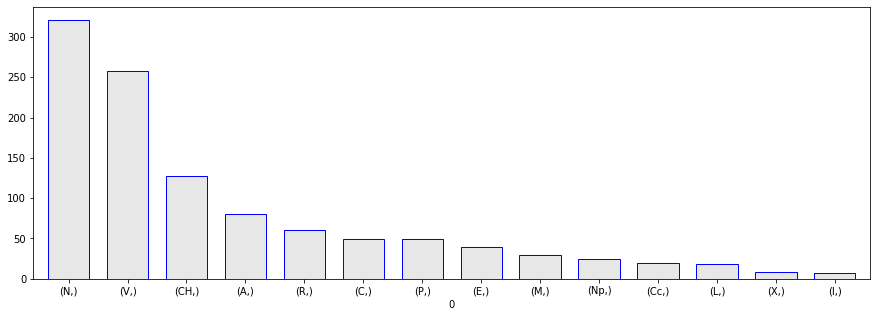

In [ ]:
tag_counts = pd.DataFrame(tags_list_manual).value_counts()
tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5),  color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum()) 

In [ ]:
# Số nhãn trong tập gán nhãn thư viện VnCoreNLP
with open('/content/drive/MyDrive/NLP/save_data/vncore_pos_tag.txt', 'r', encoding = 'utf-8') as f:
  sentences = f.readlines()
  tags_list_vncore = []
  for sentence in sentences:
    if(sentence.split()):
      if(sentence != '\n'):
        tags = sentence.split()[1]
        tags_list_vncore.append(tags)
        # print(tags)
  # print(tags_list_manual)

,V,N,CH,E,R,P,A,Np,M,C,L,Cc,X,Nc,T,Ny,Total
0,282,275,125,73,64,53,50,49,29,28,18,14,9,5,5,1,1080


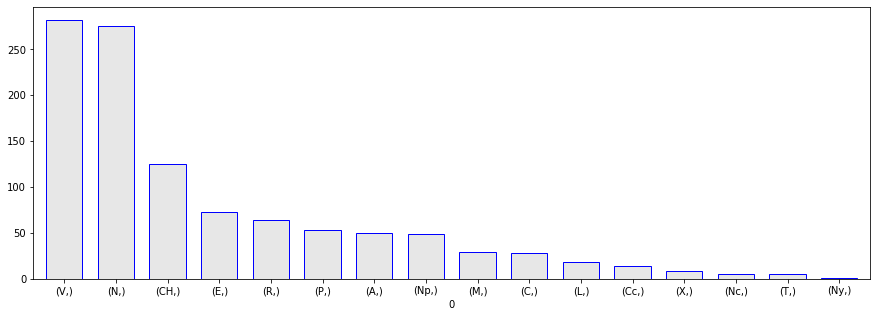

In [ ]:
tag_counts = pd.DataFrame(tags_list_vncore).value_counts()
tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5),  color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum()) 

# Chia data train test

In [ ]:
gold_corpus = open('/content/drive/MyDrive/NLP/save_data/vncore_tokenize.txt', encoding='utf-8').readlines()
test_corpus = open('/content/drive/MyDrive/NLP/save_data/vncore_tokenize.txt', encoding='utf-8').readlines()
new_line_idx = [i for i, item in enumerate(vncore) if item == '\n']

In [ ]:
with open('/content/drive/MyDrive/NLP/save_data/data_train/train_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[:new_line_idx[60]]: f.write(line)
    f.write('\n')
    
with open('/content/drive/MyDrive/NLP/save_data/data_test/test_gold.txt', 'w', encoding='utf-8') as f:
    for line in gold_corpus[new_line_idx[60] + 1:]: f.write(line)

In [ ]:
with open('/content/drive/MyDrive/NLP/save_data/data_test/test_notag.txt', 'w', encoding='utf-8') as f:
    for line in test_corpus[new_line_idx[60] + 1:]: f.write(line)